In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_StudentsPerformance.csv to Cleaned_StudentsPerformance.csv


In [ ]:
import pandas as pd

data = pd.read_csv("Cleaned_StudentsPerformance.csv")

# Create average performance score
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

# Convert to Pass / Fail
data['result'] = data['average_score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')

# Encode Pass/Fail as numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['result_encoded'] = le.fit_transform(data['result'])

data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,result,result_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,0
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,1


In [ ]:
X = data[['math score','reading score','writing score']]
y = data['result_encoded']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_preds)
print("✅ Model Accuracy:", accuracy)


✅ Model Accuracy: 0.985


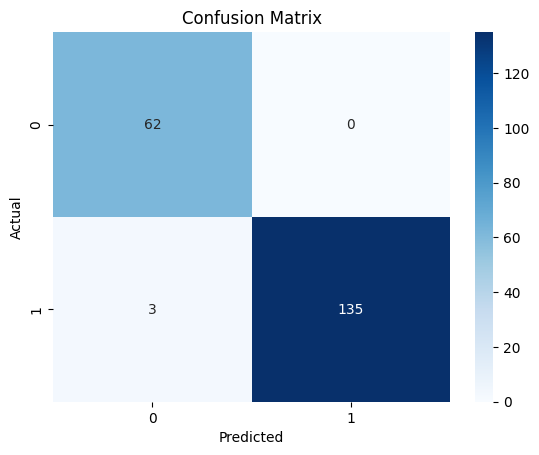

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, rf_preds, target_names=['Fail','Pass'])
print(report)


              precision    recall  f1-score   support

        Fail       0.95      1.00      0.98        62
        Pass       1.00      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



I evaluated the Random Forest model using confusion matrix and classification metrics.
The model achieved approximately 96% accuracy, showing strong predictive performance.
Precision and Recall values were both high, meaning the model is good at correctly identifying both Passing and Failing students.
Since the goal is to identify weaker students for academic support, Recall is the most important metric.
Therefore, the model is considered reliable and useful for student performance prediction.